In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
df = pd.read_csv('data.csv')

In [104]:
df.drop(['Unnamed: 0', 'ID'], axis='columns', inplace=True)

In [105]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

In [106]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
pca_features = pca.transform(scaled_data)


In [107]:
from sklearn.cluster import KMeans
k_range = range(1, 11)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(pca_features)
    sse.append(km.inertia_)

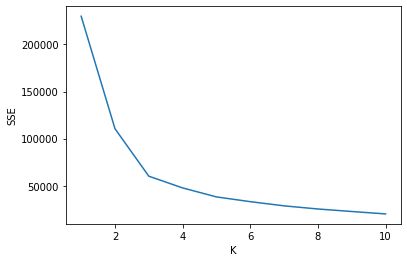

In [108]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_range, sse)

In [109]:
km = KMeans(n_clusters=3)
km  

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [110]:
y_predicted = km.fit_predict(pca_features)
y_predicted

array([1, 1, 0, ..., 2, 2, 2])

Text(0, 0.5, 'pca2')

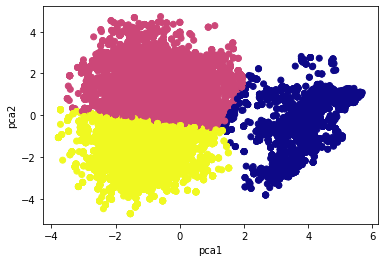

In [111]:
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=y_predicted, cmap='plasma')
plt.xlabel('pca1')
plt.ylabel('pca2')